In [35]:
import pandas as pd
import numpy as np
import time
from pandas import Series
from matplotlib.pyplot import figure
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from datetime import datetime, timedelta
import re
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels import tsa
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import calendar
from matplotlib.dates import MONDAY
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import patsy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score
import pystan
from fbprophet import Prophet
from sklearn.metrics import r2_score
pd.options.display.max_columns = 100
from sklearn.preprocessing import Imputer
from math import sqrt

In [36]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2007-12-31') & (df['date'] < '2018-12-31')
df = df.loc[mask1] 
df = df[['Crime Subcategory', 'date']]
dfg = df.groupby(['date']).count()
dfg['date']=dfg.index
dfw = dfg.resample('W').sum()
dfw=dfw[1:]
dfw=dfw[:-1]
series = dfw['Crime Subcategory']
dfw.rename(columns={'Crime Subcategory': 'number_crimes'}, inplace=True)
dfw

/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


,number_crimes
date,
2008-01-13,787
2008-01-20,743
2008-01-27,718
2008-02-03,657
2008-02-10,689
2008-02-17,755
2008-02-24,783
2008-03-02,786
2008-03-09,742


In [4]:
df1.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
2017-11-01,134,134,134,134,134,134,134,134,132,132,134
2017-11-02,124,124,124,124,124,124,124,124,122,122,124
2017-11-03,136,136,136,136,136,136,136,136,135,135,136
2017-11-04,107,107,107,107,107,107,107,107,106,106,107
2017-11-05,113,113,113,113,113,113,113,113,111,111,113


In [5]:
df1['y']=df1['Crime Subcategory']
df1['ds']=df1.index

In [6]:
df1.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,y,ds
2017-11-01,134,134,134,134,134,134,134,134,132,132,134,134,2017-11-01
2017-11-02,124,124,124,124,124,124,124,124,122,122,124,124,2017-11-02
2017-11-03,136,136,136,136,136,136,136,136,135,135,136,136,2017-11-03
2017-11-04,107,107,107,107,107,107,107,107,106,106,107,107,2017-11-04
2017-11-05,113,113,113,113,113,113,113,113,111,111,113,113,2017-11-05


In [7]:
df1.tail()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,y,ds
2017-12-13,144,144,144,144,144,144,144,144,141,141,144,144,2017-12-13
2017-12-14,122,122,122,122,122,122,122,122,121,121,122,122,2017-12-14
2017-12-15,150,150,150,150,150,150,150,150,150,150,150,150,2017-12-15
2017-12-16,164,164,164,164,164,164,164,164,163,163,164,164,2017-12-16
2017-12-17,138,138,138,138,138,138,138,138,138,138,138,138,2017-12-17


In [8]:
daily = df1[['ds','y']]


In [9]:
m = Prophet()
m.fit(daily)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
future = m.make_future_dataframe(periods=14)
future.tail()

,ds
56,2017-12-27
57,2017-12-28
58,2017-12-29
59,2017-12-30
60,2017-12-31


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2017-12-27,148.891951,132.037859,164.985690
57,2017-12-28,134.485144,117.927810,150.685306
58,2017-12-29,162.622351,146.865432,178.045970
59,2017-12-30,149.819654,134.361742,165.878864
60,2017-12-31,140.950586,124.347581,157.815396


In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-01,127.739480,115.575832,147.518220,127.739480,127.739480,4.030619,4.030619,4.030619,4.030619,4.030619,4.030619,0.0,0.0,0.0,131.770099
1,2017-11-02,128.045299,102.510397,134.352440,128.045299,128.045299,-10.681866,-10.681866,-10.681866,-10.681866,-10.681866,-10.681866,0.0,0.0,0.0,117.363433
2,2017-11-03,128.351118,129.283877,160.532065,128.351118,128.351118,17.149665,17.149665,17.149665,17.149665,17.149665,17.149665,0.0,0.0,0.0,145.500783
3,2017-11-04,128.656937,116.180669,147.163990,128.656937,128.656937,4.041291,4.041291,4.041291,4.041291,4.041291,4.041291,0.0,0.0,0.0,132.698228
4,2017-11-05,128.962756,108.279846,140.854517,128.962756,128.962756,-5.133454,-5.133454,-5.133454,-5.133454,-5.133454,-5.133454,0.0,0.0,0.0,123.829302
5,2017-11-06,129.268575,110.143605,141.728798,129.268575,129.268575,-3.728676,-3.728676,-3.728676,-3.728676,-3.728676,-3.728676,0.0,0.0,0.0,125.539899
6,2017-11-07,129.574394,108.072609,141.048646,129.574394,129.574394,-5.677579,-5.677579,-5.677579,-5.677579,-5.677579,-5.677579,0.0,0.0,0.0,123.896815
7,2017-11-08,129.880213,118.522754,151.419222,129.880213,129.880213,4.030619,4.030619,4.030619,4.030619,4.030619,4.030619,0.0,0.0,0.0,133.910832
8,2017-11-09,130.186032,103.849874,134.803853,130.186032,130.186032,-10.681866,-10.681866,-10.681866,-10.681866,-10.681866,-10.681866,0.0,0.0,0.0,119.504166
9,2017-11-10,130.491851,132.040141,164.178349,130.491851,130.491851,17.149665,17.149665,17.149665,17.149665,17.149665,17.149665,0.0,0.0,0.0,147.641516


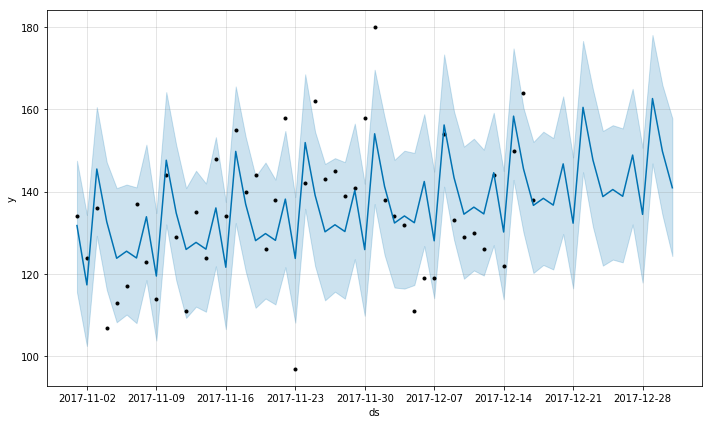

In [13]:
fig1 = m.plot(forecast)

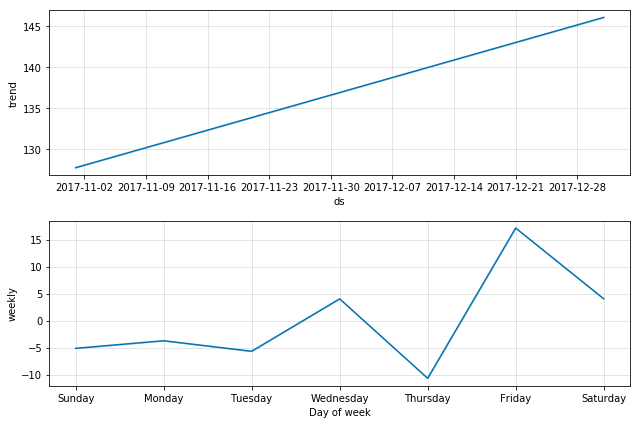

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
compare = forecast[['ds','yhat']]
compare.index = compare['ds']
compare

,ds,yhat
ds,,
2017-11-01,2017-11-01,131.770099
2017-11-02,2017-11-02,117.363433
2017-11-03,2017-11-03,145.500783
2017-11-04,2017-11-04,132.698228
2017-11-05,2017-11-05,123.829302
2017-11-06,2017-11-06,125.539899
2017-11-07,2017-11-07,123.896815
2017-11-08,2017-11-08,133.910832
2017-11-09,2017-11-09,119.504166


In [16]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2017-10-31') & (df['date'] < '2018-01-01')
df2 = df.loc[mask1] 
df2 = df2.groupby(['date']).count()
print(df2.shape)
idx = pd.date_range('11-01-2017', '12-31-2017')
df2.index = pd.DatetimeIndex(df2.index)
df2 = df2.reindex(idx, fill_value=0)
print(df2.shape)


(61, 11)
(61, 11)


/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


In [17]:
df2['date']=df2.index
df2

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,date
2017-11-01,134,134,134,134,134,134,134,134,132,132,134,2017-11-01
2017-11-02,124,124,124,124,124,124,124,124,122,122,124,2017-11-02
2017-11-03,136,136,136,136,136,136,136,136,135,135,136,2017-11-03
2017-11-04,107,107,107,107,107,107,107,107,106,106,107,2017-11-04
2017-11-05,113,113,113,113,113,113,113,113,111,111,113,2017-11-05
2017-11-06,117,117,117,117,117,117,117,117,117,117,117,2017-11-06
2017-11-07,137,137,137,137,137,137,137,137,137,137,137,2017-11-07
2017-11-08,123,123,123,123,123,123,123,123,122,122,123,2017-11-08
2017-11-09,114,114,114,114,114,114,114,114,112,112,114,2017-11-09
2017-11-10,144,144,144,144,144,144,144,144,143,143,144,2017-11-10


In [18]:
comparef = compare.loc[(compare['ds'] < '2018-01-01')& (compare['ds'] > '2017-10-31')] 

In [19]:
comparef.tail()

,ds,yhat
ds,,
2017-12-27,2017-12-27,148.891951
2017-12-28,2017-12-28,134.485144
2017-12-29,2017-12-29,162.622351
2017-12-30,2017-12-30,149.819654
2017-12-31,2017-12-31,140.950586


In [20]:
link = comparef.join(df2['Crime Subcategory'])
link

,ds,yhat,Crime Subcategory
ds,,,
2017-11-01,2017-11-01,131.770099,134
2017-11-02,2017-11-02,117.363433,124
2017-11-03,2017-11-03,145.500783,136
2017-11-04,2017-11-04,132.698228,107
2017-11-05,2017-11-05,123.829302,113
2017-11-06,2017-11-06,125.539899,117
2017-11-07,2017-11-07,123.896815,137
2017-11-08,2017-11-08,133.910832,123
2017-11-09,2017-11-09,119.504166,114


Text(0,0.5,'Number of crimes')

<Figure size 432x288 with 0 Axes>

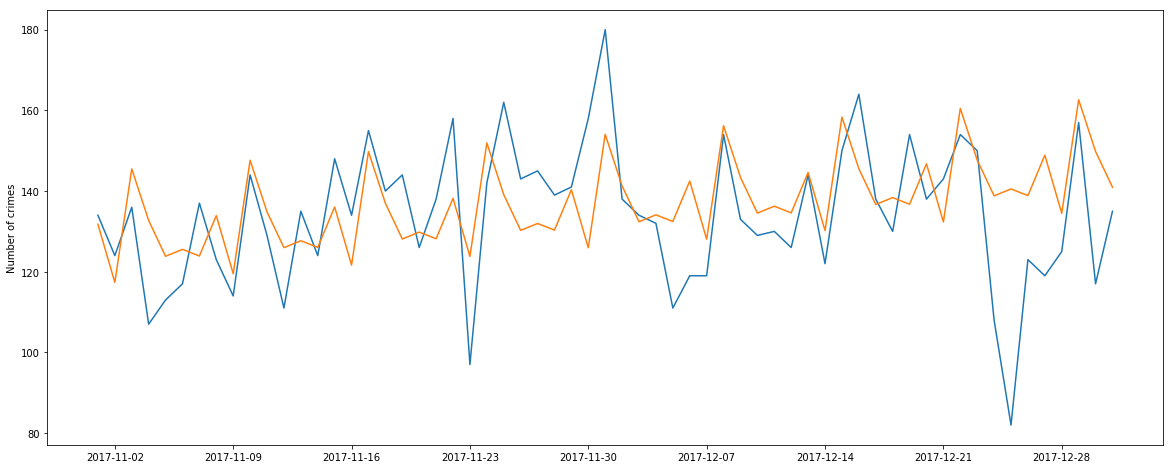

In [21]:
plt.clf()
plt.figure(figsize=[20,8]) 
plt.plot(link['Crime Subcategory'], label = 'All Crimes')
plt.plot(link['yhat'], label = 'Predicted Crimes')
plt.ylabel('Number of crimes')


In [22]:
rmse = sqrt(mean_squared_error(link['Crime Subcategory'], link['yhat']))
rmse

15.880759976006065

In [23]:
# mask1 = (df['date'] > '2017-10-31') & (df['date'] < '2018-01-01')
# df2 = df.loc[mask1]
only = link.loc[(link['ds']>'2017-12-17')]

In [24]:
rmse = sqrt(mean_squared_error(only['Crime Subcategory'], only['yhat']))
rmse

22.927767623774955

## Weekly totals

In [25]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2007-12-31') & (df['date'] < '2018-01-14')
df = df.loc[mask1] 
df = df[['Crime Subcategory', 'date']]
dfg = df.groupby(['date']).count()
dfg['date']=dfg.index
dfw = dfg.resample('W').sum()
dfw

/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


,Crime Subcategory
date,
2008-01-06,709
2008-01-13,787
2008-01-20,743
2008-01-27,718
2008-02-03,657
2008-02-10,689
2008-02-17,755
2008-02-24,783
2008-03-02,786


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


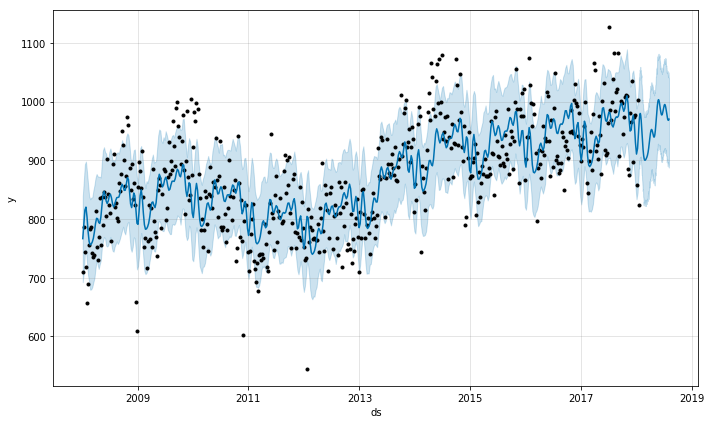

In [26]:
dfw['y'] = dfw ['Crime Subcategory']
dfw['ds'] = dfw.index
m1 = Prophet(seasonality_mode='multiplicative').fit(dfw)
future = m1.make_future_dataframe(periods=200)
fcst = m1.predict(future)
fig = m1.plot(fcst)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


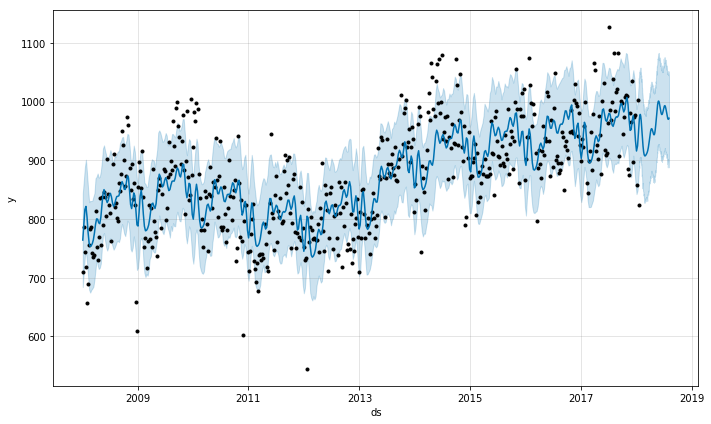

In [27]:
dfw['y'] = dfw ['Crime Subcategory']
dfw['ds'] = dfw.index
m1 = Prophet(seasonality_mode='additive').fit(dfw)
future = m1.make_future_dataframe(periods=200)
fcst = m1.predict(future)
fig = m1.plot(fcst)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


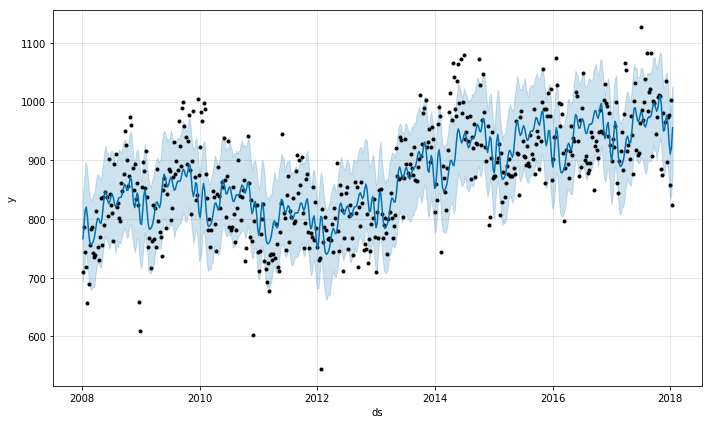

In [28]:
dfw['y'] = dfw ['Crime Subcategory']
dfw['ds'] = dfw.index
m1 = Prophet(seasonality_mode='multiplicative').fit(dfw)
future = m1.make_future_dataframe(periods=1)
fcst = m1.predict(future)
fig = m1.plot(fcst)

/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


(3893, 11)


Text(0,0.5,'Number of crimes')

<Figure size 432x288 with 0 Axes>

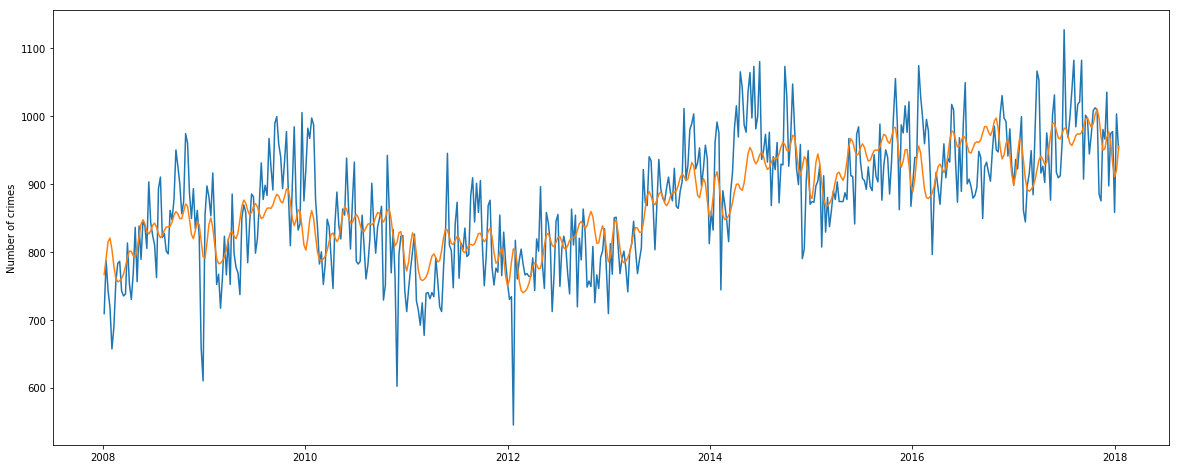

In [30]:
c = fcst[['ds','yhat']]
c.index = c['ds']
c
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2007-12-31') 
df2 = df.loc[mask1] 
df2 = df2.groupby(['date']).count()
print(df2.shape)
idx = pd.date_range('01-01-2008', '08-28-2018')
df2.index = pd.DatetimeIndex(df2.index)

df2['date']=df2.index
df2
dfw = df2.resample('W').sum()
cf = c.loc[(c['ds'] < '2018-08-29')& (c['ds'] > '2007-12-31')] 
link = cf.join(dfw)

plt.clf()
plt.figure(figsize=[20,8]) 
plt.plot(link['Crime Subcategory'], label = 'All Crimes by Week')
plt.plot(link['yhat'], label = 'Predicted Crimes by Week')
plt.ylabel('Number of crimes')

In [31]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2014-12-31') & (df['date'] < '2018-01-25')
df = df.loc[mask1] 
df = df[['Crime Subcategory', 'date']]
dfg = df.groupby(['date']).count()
dfg['date']=dfg.index
dfw = dfg.resample('W').sum()
print(dfw.head())
dfw = dfw[1:]
dfw=dfw[:-2]
dfw

            Crime Subcategory
date                         
2015-01-04                476
2015-01-11                873
2015-01-18                897
2015-01-25                904
2015-02-01                927


/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


,Crime Subcategory
date,
2015-01-11,873
2015-01-18,897
2015-01-25,904
2015-02-01,927
2015-02-08,807
2015-02-15,912
2015-02-22,829
2015-03-01,880
2015-03-08,837


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


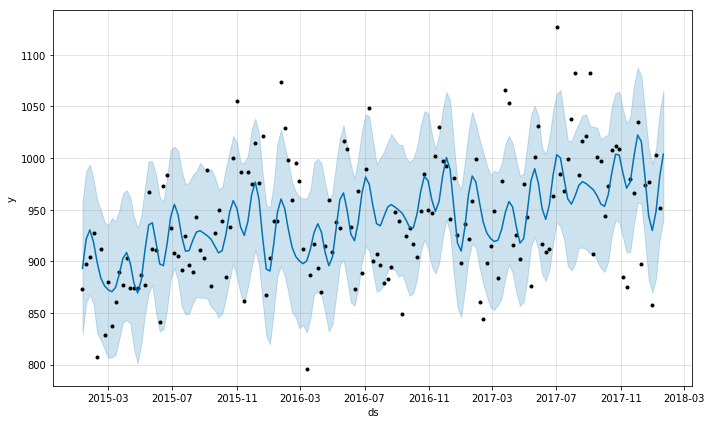

In [32]:
dfw['y'] = dfw ['Crime Subcategory']
dfw['ds'] = dfw.index
m1 = Prophet(seasonality_mode='multiplicative').fit(dfw)
future = m1.make_future_dataframe(periods = 1, freq='W', include_history=True)
#future = m1.make_future_dataframe(periods=1)
fcst = m1.predict(future)
fig = m1.plot(fcst)

In [33]:
y14 = dfw['Crime Subcategory']
yhat14 = fcst['yhat']
rmse = sqrt(mean_squared_error(y14[-14:],yhat14[-14:]))
rmse

56.07771145572231

In [34]:
plt.clf()
plt.figure(figsize=[20,8]) 
plt.plot(y14[-14:], label = 'All Crimes by Week')
plt.plot(yhat14[-14:], label = 'Predicted Crimes by Week')
plt.ylabel('Number of crimes')

Text(0,0.5,'Number of crimes')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11a6f4840> (for post_execute):


ValueError: view limit minimum -36683.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 0 Axes>

ValueError: view limit minimum -36683.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x576 with 1 Axes>

In [ ]:
yhat14

## Crime Histograms

In [179]:
crimes = ['CAR PROWL', 'NARCOTIC', 'ROBBERY-STREET', 'DUI',
       'BURGLARY-RESIDENTIAL', 'BURGLARY-COMMERCIAL',
       'MOTOR VEHICLE THEFT', 'THEFT-SHOPLIFT', 'SEX OFFENSE-OTHER',
       'THEFT-BUILDING', 'THEFT-ALL OTHER', 'RAPE', 'AGGRAVATED ASSAULT',
       'TRESPASS', 'LIQUOR LAW VIOLATION', 'FAMILY OFFENSE-NONVIOLENT',
       'ROBBERY-RESIDENTIAL', 'AGGRAVATED ASSAULT-DV', 'WEAPON',
       'PROSTITUTION', 'THEFT-BICYCLE', 'HOMICIDE', 'LOITERING',
       'ARSON', 'ROBBERY-COMMERCIAL', 'DISORDERLY CONDUCT', 'PORNOGRAPHY',
       'GAMBLE', 'BURGLARY-RESIDENTIAL-SECURE PARKING',
       'BURGLARY-COMMERCIAL-SECURE PARKING']

In [226]:
def plots():
    for crime in crimes:
        filt= df1[df1['Crime Subcategory'].isin([crime])]
        filt = filt.groupby(['date']).count()
        filt['date'] = filt.index
        idx = pd.date_range('01-01-2008', '12-31-2017')
        filt.index = pd.DatetimeIndex(filt.index)
        filt = filt.reindex(idx, fill_value=0)
        plt.figure(figsize=[12,4]) 
        plt.hist(filt['Crime Subcategory'])
        plt.title("{}".format(crime))

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


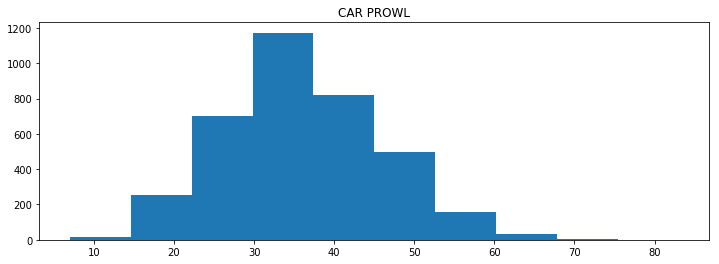

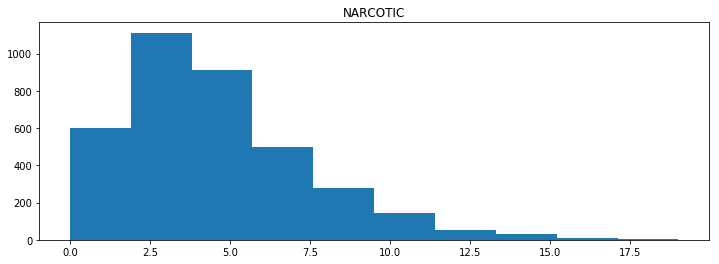

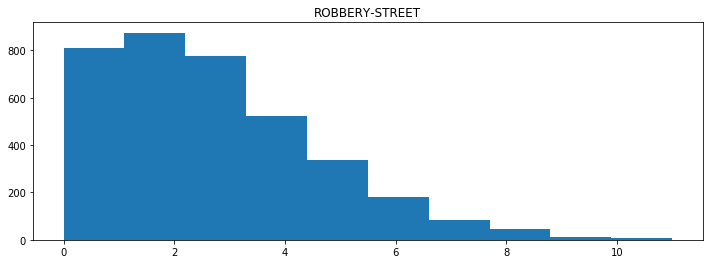

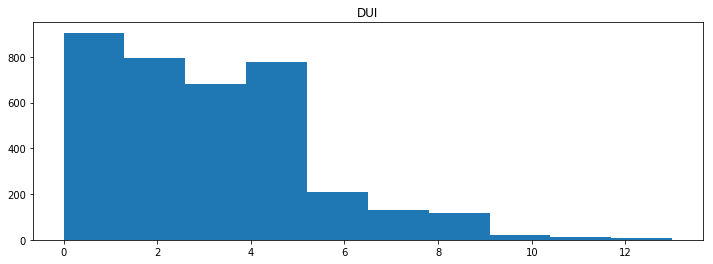

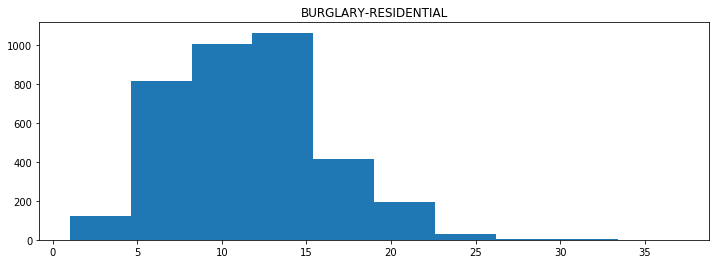

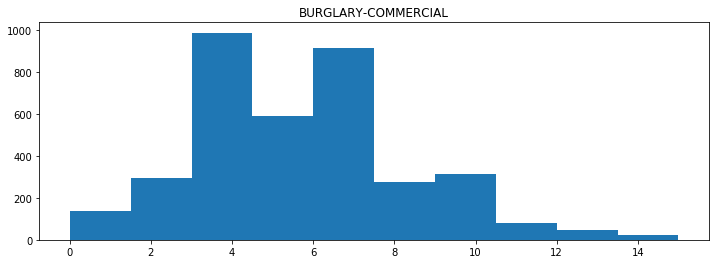

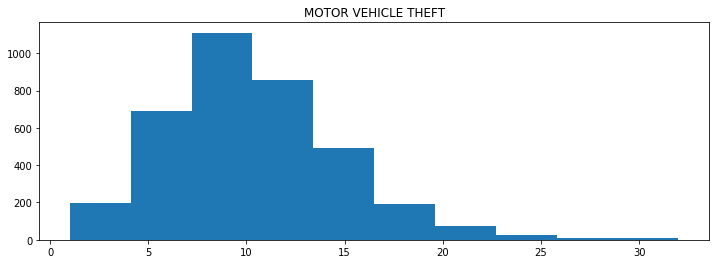

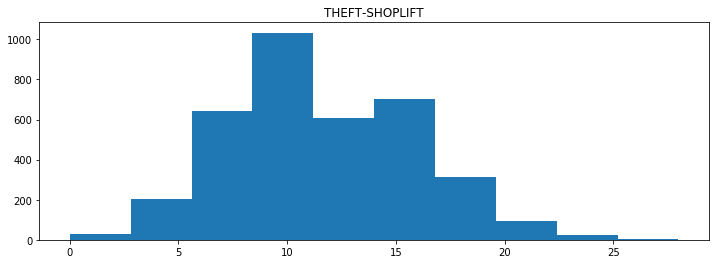

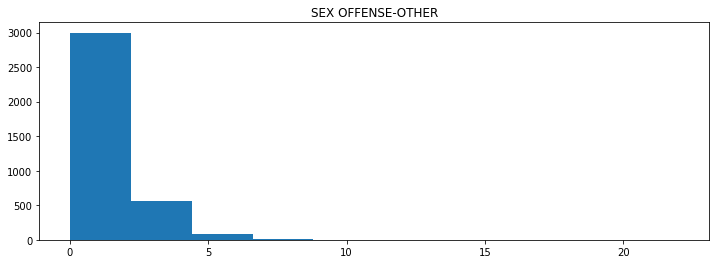

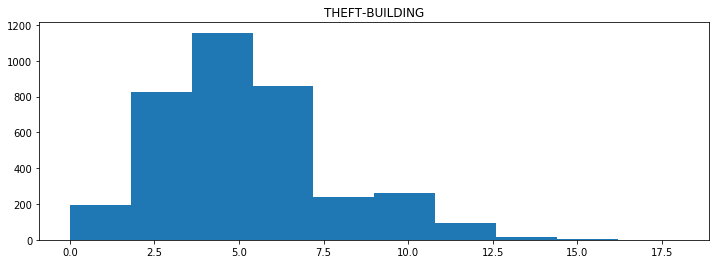

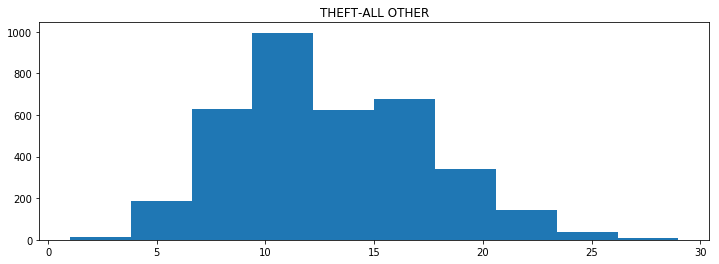

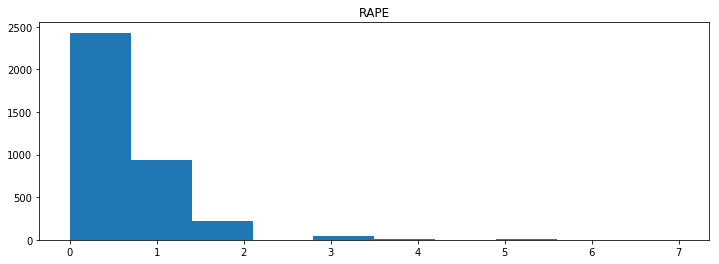

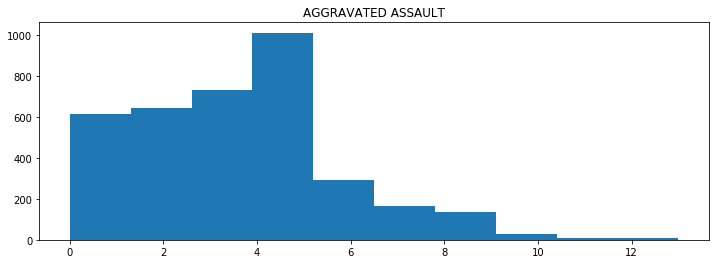

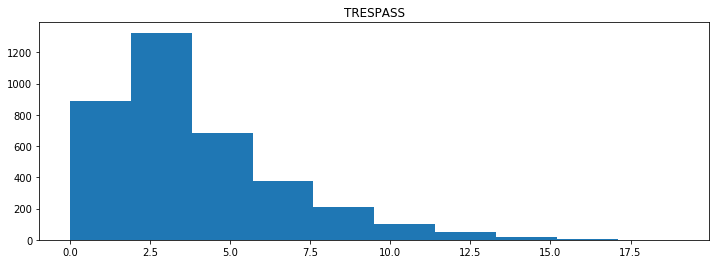

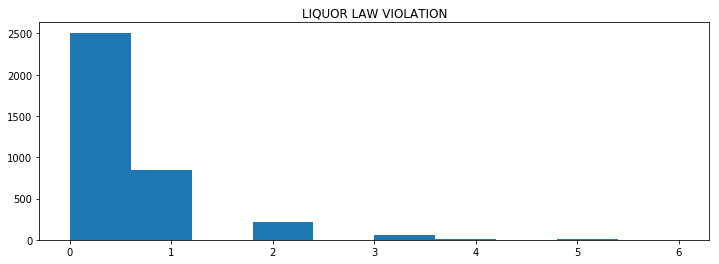

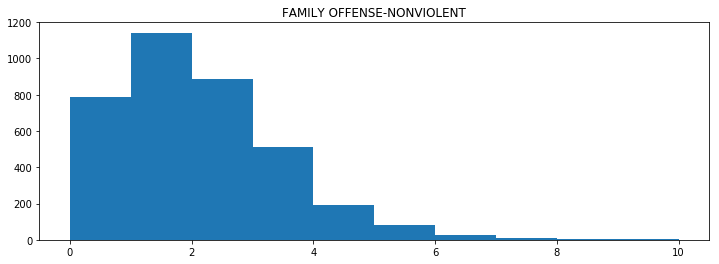

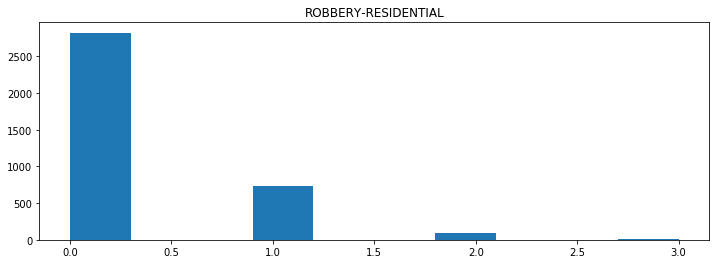

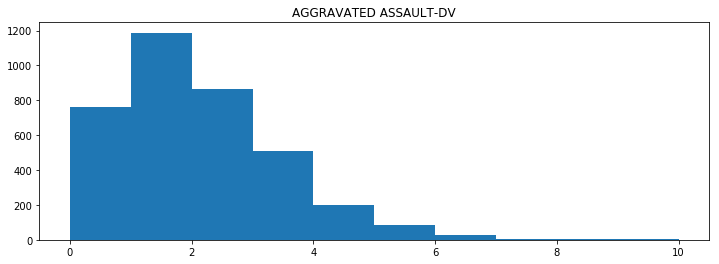

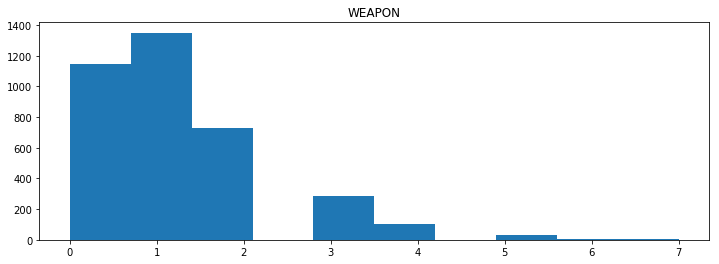

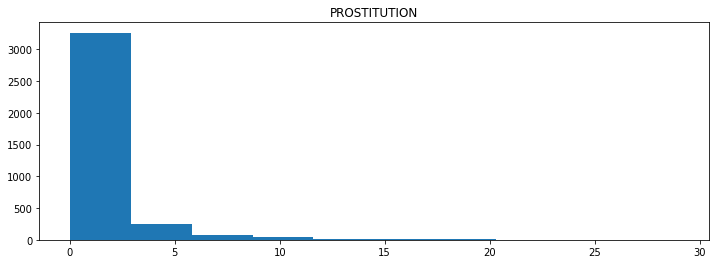

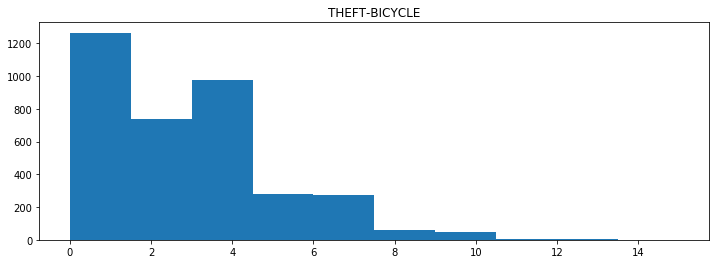

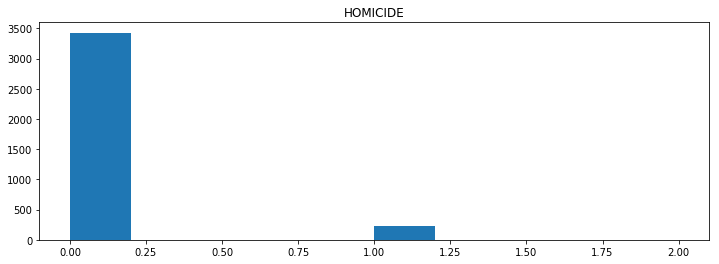

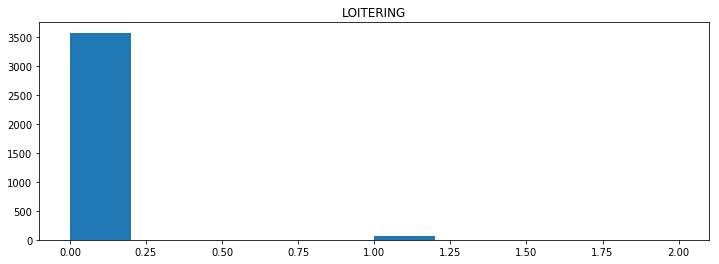

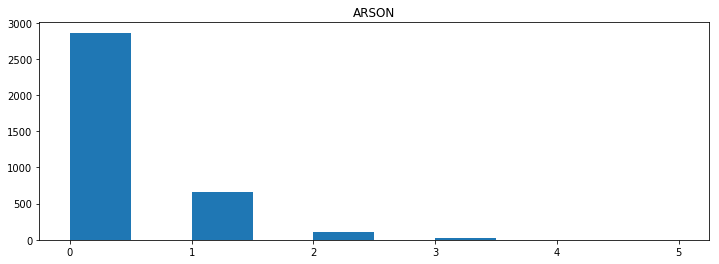

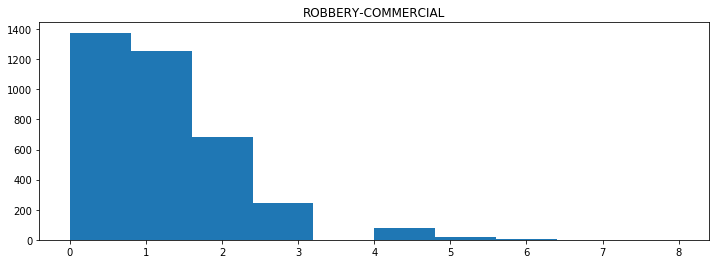

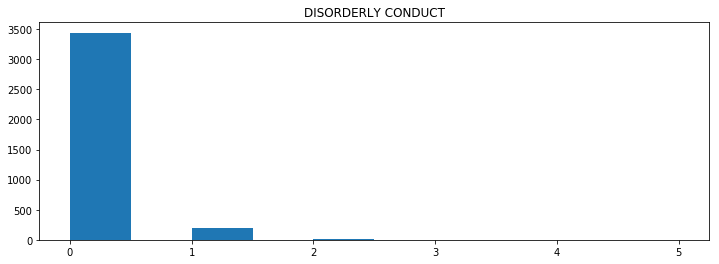

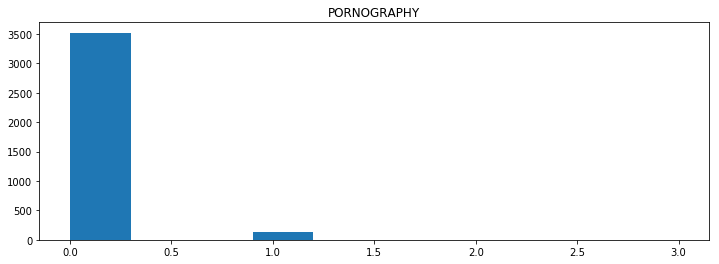

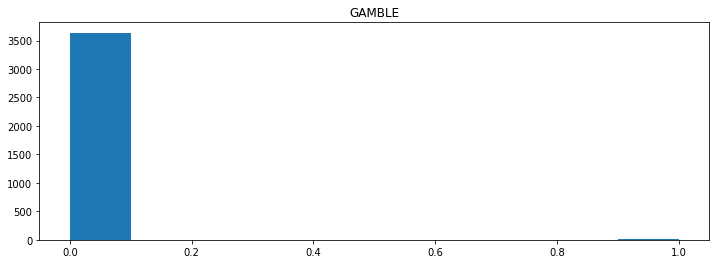

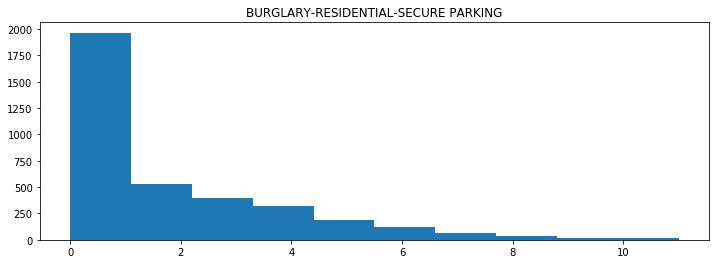

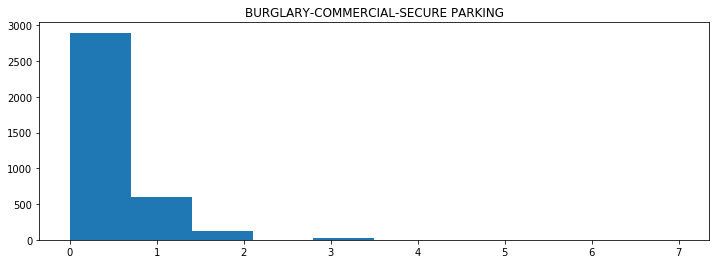

In [227]:
plots()

In [241]:
temp = Series(df['Report Number'])